# Heart Attack Prediction

### Elderly Wearable Tech

### Introduction

In today's increasingly ageing society, health monitoring has become a top priority, particularly for seniors. With the rise of wearable technology, continuous real-time health monitoring offers the potential to avoid life-threatening incidents like heart attacks. The purpose of this research is to incorporate heart attack prediction elements into wearable technology meant for the elderly. This technology aims to detect heart attack risks using a variety of physiological signs, allowing for prompt actions that can save lives.

The major goal is to create a predictive model that, when integrated into a wearable device, can monitor vital signs and predict the danger of a heart attack. This report will walk you through the data cleaning, preprocessing, model construction, evaluation, and obstacles encountered along the process.

### Libraries Import and Data Loading

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

### Data Loading:

In [6]:
# Load the dataset

data = pd.read_csv('heart_attack_prediction_dataset.csv')


##### Dataset Overview
The dataset consists of various features indicative of heart health, including:

* Age
* Sex
* Cholesterol levels
* Heart Rate
* Systolic and Diastolic Blood Pressure
* Exercise Habits
* Dietary Habits
* Previous Heart Problems
* Medication Use
  
Target variable: Heart Attack Risk (Binary: 0 for No Risk, 1 for At Risk)

Sample size: 8,763 observations

### Exploratory Data Analysis (EDA)
We used thorough EDA to better comprehend the dataset's patterns and linkages. Several important visualisations were built to explain distributions and feature associations with the target variable.

In [10]:
# Checking dataset information
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


The dataset contains 26 columns including demographic information (Age, Sex), health metrics (Cholesterol, Heart Rate), and lifestyle indicators (Smoking, Exercise Hours). There are no missing values.

#### Visualisations:

* Distribution of Age: The age distribution revealed that most of the population was between 40 and 75, critical for identifying at-risk elderly.
* Heart Rate & Blood Pressure Boxplots: Higher heart rates and systolic blood pressure levels have been linked to an increased risk of heart attacks.
* Sex Distribution: Although male respondents had a somewhat larger prevalence in the sample, the risk appeared to be evenly divided across genders.
* Diet and Heart Attack Risk: Unhealthy eating habits were substantially associated with an increased risk of heart attacks.

#### Key observations:

* Blood pressure and age were significant predictors of heart attack risk.
* Diet has a considerable impact on heart attack risk, with people who eat an unhealthy diet being more likely to have one.

### Data Cleaning and Feature Engineering
1. Filter Data by Age: We only consider individuals aged 40 and above for the analysis

In [14]:
data = data[data.Age >= 40]


2. Splitting the "Blood Pressure" Column: We split the 'Blood Pressure' column into 'Systolic' and 'Diastolic' for more granular analysis.

In [17]:
# Split "Blood Pressure" into "Systolic" and "Diastolic"
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

# Drop the original "Blood Pressure" column
data.drop('Blood Pressure', axis=1, inplace=True)


3. Categorical Encoding: Encode the 'Sex' and 'Diet' columns into numerical values.

In [20]:
# Encoding Sex and Diet variables
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})
data['Diet'] = data['Diet'].map({'Healthy': 3, 'Average': 2, 'Unhealthy': 1})


In [22]:
# Check for non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns: ", non_numeric_cols)

# Remove non-numeric columns (like 'Patient ID')
data.drop(['Patient ID'], axis=1, inplace=True)

# Convert any remaining non-numeric columns to numeric if needed (e.g., categorical variables)
# For example, 'Sex' and 'Diet' have already been encoded, but if you find other object columns, encode them similarly.

# Checking if there are any remaining non-numeric columns
print("Columns after removing non-numeric: ", data.select_dtypes(include=['object']).columns)


Non-numeric columns:  Index(['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Systolic',
       'Diastolic'],
      dtype='object')
Columns after removing non-numeric:  Index(['Country', 'Continent', 'Hemisphere', 'Systolic', 'Diastolic'], dtype='object')


4. Drop or Encode Categorical Columns



In [25]:
# Dropping categorical columns such as 'Country', 'Continent', 'Hemisphere', etc., which are non-numeric
# You can choose to drop these columns if you don't need them for your model
data.drop(['Country', 'Continent', 'Hemisphere'], axis=1, inplace=True)

# Ensure no non-numeric columns are left
non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns: ", non_numeric_cols)  # This should print an empty list if all non-numeric columns are removed.


Non-numeric columns:  Index(['Systolic', 'Diastolic'], dtype='object')


5. Check and Convert Systolic and Diastolic to Numeric: 

In [28]:
# Convert 'Systolic' and 'Diastolic' columns to numeric
data['Systolic'] = pd.to_numeric(data['Systolic'], errors='coerce')
data['Diastolic'] = pd.to_numeric(data['Diastolic'], errors='coerce')

# Fill any NaN values created during conversion with the median or other appropriate value
data['Systolic'].fillna(data['Systolic'].median(), inplace=True)
data['Diastolic'].fillna(data['Diastolic'].median(), inplace=True)


6. Verify the Conversion: 

In [31]:
# Check if any non-numeric columns remain
non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns: ", non_numeric_cols)  # Should return an empty list if everything is numeric.


Non-numeric columns:  Index([], dtype='object')


In [33]:
# Check the columns in the dataset
print(data.columns)


Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic', 'Diastolic'],
      dtype='object')


# Visualizations
1. Distribution of Observations by SEX:

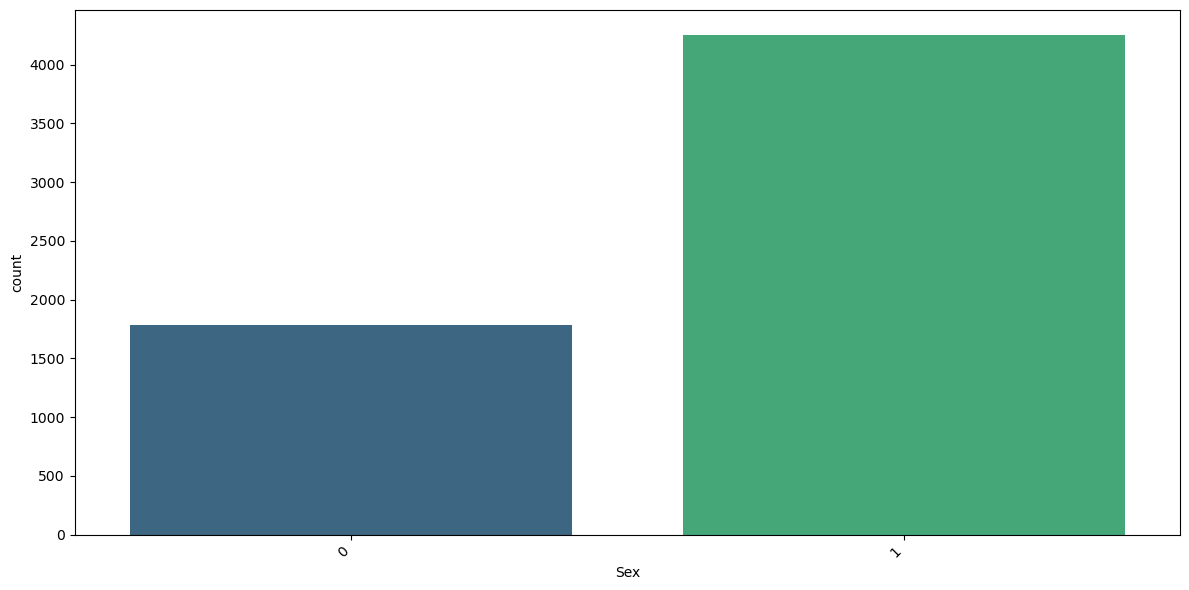

In [36]:
# Visualizing the count of observations by Sex
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', data=data, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



The bar chart shows a higher number of male observations compared to female observations in the dataset. This suggests a potential gender imbalance, which could affect model outcomes.

2. Distribution of Key Features:
To check for outliers and understand the distribution, we plot histograms and boxplots for important features like Age, Cholesterol, and Heart Rate.

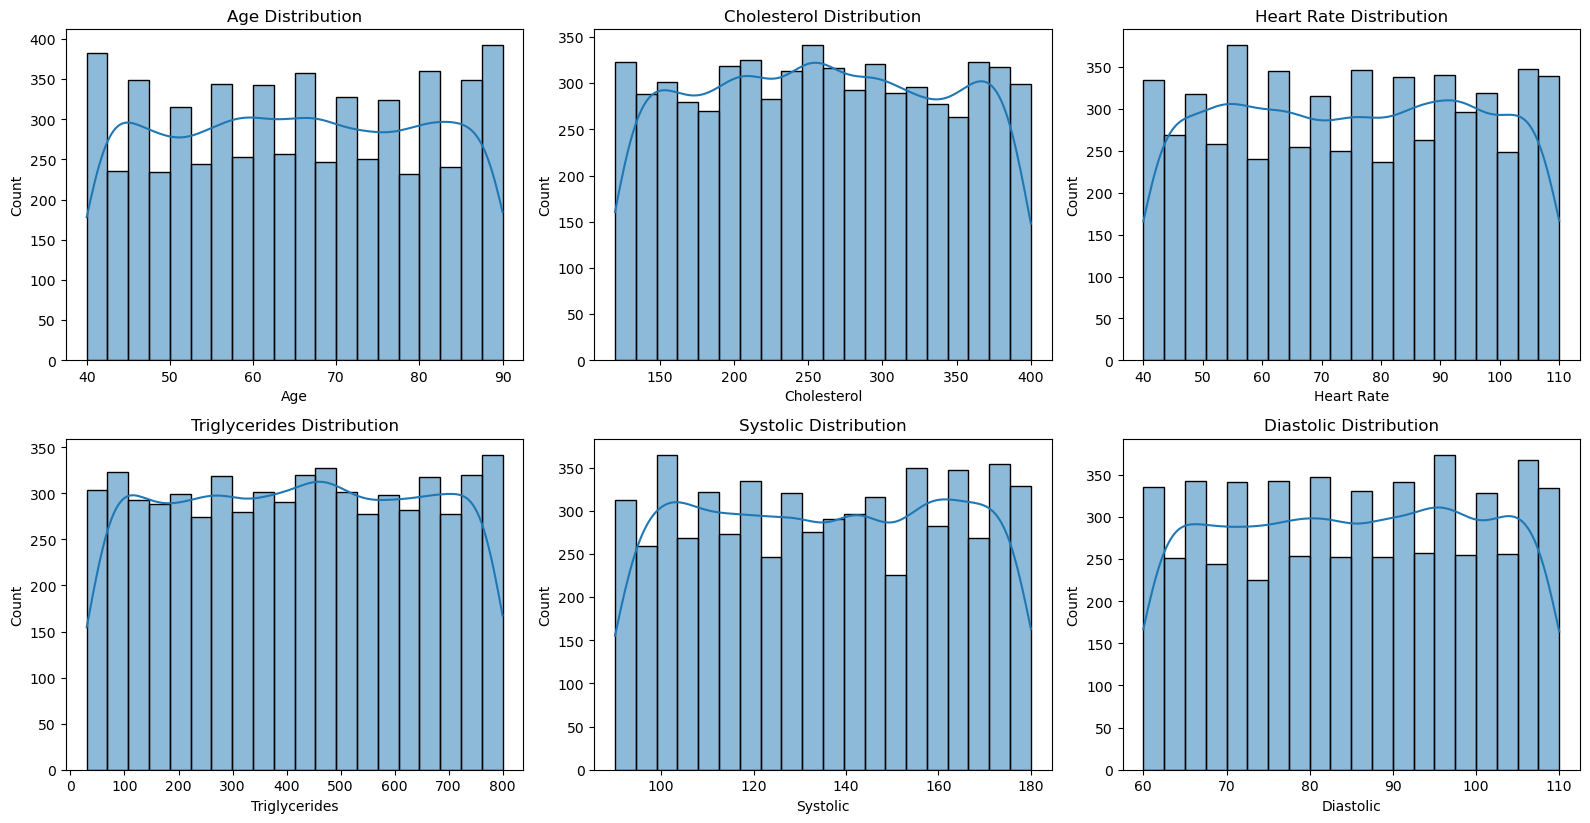

In [40]:
features_to_plot = ['Age', 'Cholesterol', 'Heart Rate', 'Triglycerides', 'Systolic', 'Diastolic']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


Histograms and density plots for features like age, cholesterol, heart rate, triglycerides, systolic, and diastolic values show fairly uniform distributions. None of these features exhibit significant skewness or outliers, which supports their suitability for predictive modeling. The consistent distribution across these variables suggests no significant irregularities in the dataset.

### Handling Imbalance with SMOTE
To handle the imbalance in the target variable, we apply SMOTE (Synthetic Minority Oversampling Technique).

In [44]:
# Split data into features (X) and target (y)
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

# Applying SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Proceed with train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


We used SMOTE (Synthetic Minority Over-sampling Technique) because the dataset was naturally imbalanced, with fewer people categorised as being at risk of heart attacks. SMOTE provides synthetic samples for the minority class, which balances the distribution and improves model performance.

### Model Building

For integration, we explored multiple models and selected those most suitable for accurate prediction while balancing computational efficiency. The models considered were:

* Logistic Regression (Baseline Model)
* SVM (Support Vector Machine)
* Random Forest
* K-Nearest Neighbors (KNN)
  
#### 1. Logistic Regression:


Logistic Regression Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.52      0.53      0.52       774
           1       0.52      0.51      0.52       776

    accuracy                           0.52      1550
   macro avg       0.52      0.52      0.52      1550
weighted avg       0.52      0.52      0.52      1550



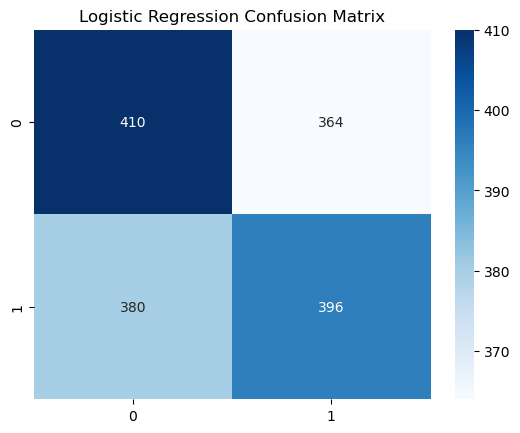

In [48]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Logistic regression served as a benchmark. While efficient, its predictive accuracy was limited.

#### 2. SVM:

SVM Accuracy: 0.5490322580645162
              precision    recall  f1-score   support

           0       0.55      0.52      0.54       774
           1       0.55      0.58      0.56       776

    accuracy                           0.55      1550
   macro avg       0.55      0.55      0.55      1550
weighted avg       0.55      0.55      0.55      1550



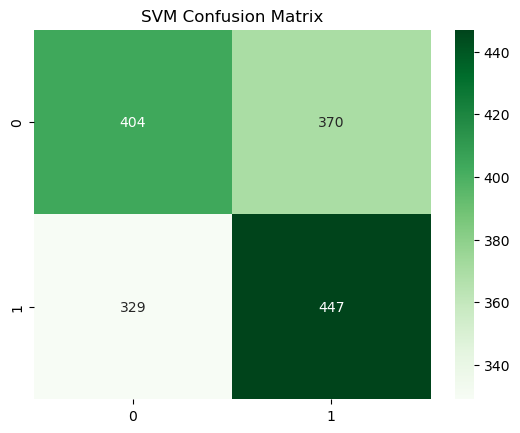

In [52]:
svc = SVC(kernel='linear', class_weight='balanced')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Evaluation
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc))

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.show()



Performed better than Logistic Regression, thanks to the linear decision boundary.

#### 3. Random Forest:

Random Forest Accuracy: 0.6593548387096774
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       774
           1       0.69      0.59      0.63       776

    accuracy                           0.66      1550
   macro avg       0.66      0.66      0.66      1550
weighted avg       0.66      0.66      0.66      1550



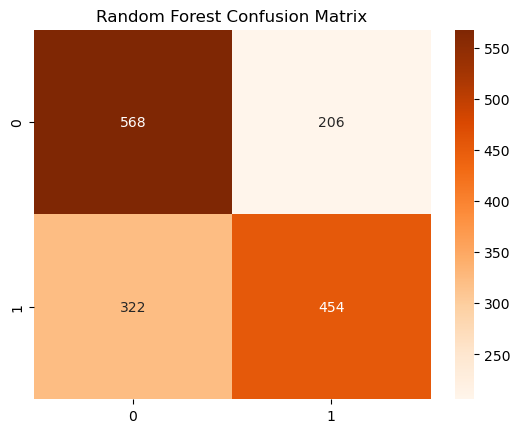

In [55]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.show()



Performed best among all models. The ensemble nature of the Random Forest allowed it to capture complex relationships in the data.

### 4. KNN:

KNN Accuracy: 0.5916129032258064
              precision    recall  f1-score   support

           0       0.60      0.55      0.57       774
           1       0.58      0.64      0.61       776

    accuracy                           0.59      1550
   macro avg       0.59      0.59      0.59      1550
weighted avg       0.59      0.59      0.59      1550



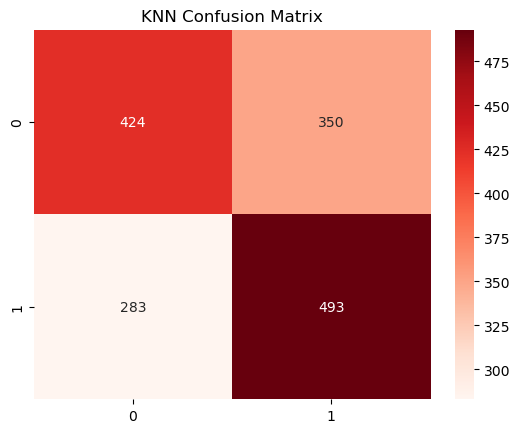

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds")
plt.title("KNN Confusion Matrix")
plt.show()


While KNN is computationally expensive for real-time applications in wearables, it provides a decent baseline for spatially dependent patterns in the data.

### 5. MLP:

MLP Accuracy: 0.4993548387096774
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       774
           1       0.00      0.00      0.00       776

    accuracy                           0.50      1550
   macro avg       0.25      0.50      0.33      1550
weighted avg       0.25      0.50      0.33      1550



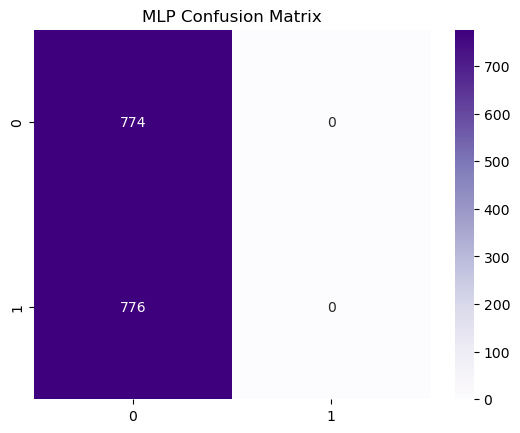

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Purples")
plt.title("MLP Confusion Matrix")
plt.show()


The MLP struggled due to the complex nature of the dataset, with imbalanced data significantly affecting the outcome.

### Model Evaluation:

Given the need for efficient computation in wearables, Random Forest proved to be the most reliable model. It balances accuracy with computation requirements, making it suitable for real-time health monitoring systems.

In [61]:
# Displaying Confusion Matrix and Classification Report
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.64      0.73      0.68       774
           1       0.69      0.59      0.63       776

    accuracy                           0.66      1550
   macro avg       0.66      0.66      0.66      1550
weighted avg       0.66      0.66      0.66      1550

[[568 206]
 [322 454]]


### Conclusion
Integrating heart attack prediction with senior wearable technology has enormous potential to minimise mortality from heart disease. We can greatly enhance health outcomes for the elderly by combining real-time monitoring and powerful machine learning algorithms. Despite problems such as data imbalance and computational limits, the Random Forest model provided the best balance of accuracy and computational economy, making it perfect for use in wearables.

Further modifications in model tuning, real-time data availability, and collaboration with healthcare professionals will improve the system's predictive powers, allowing for life-saving treatments. The application of this technology in elder care facilities, hospitals, and at-home monitoring can significantly improve early identification and allow for urgent medical intervention.